In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
from scipy import stats

### 1D

In [3]:
w = 15
np.random.seed(10)

y = np.random.uniform(low = 0, high = w , size = 100)    

In [4]:
def posterior(alpha, beta, w):
    res = [(((alpha * (beta ** alpha)) / (w ** (alpha + 1))) * (w >= beta)) for w in w]
    return res

_range = np.arange(10, 25, 0.01)

d1_alpha = 2
d10_alpha = 11
d50_alpha = 51
d100_alpha = 101

d1_beta = max(y[0], 10)
d10_beta = max(max(y[:10]), 10)
d50_beta = max(max(y[:50]), 10)
d100_beta = max(max(y[:100]), 10)
print(d1_beta, d10_beta, d50_beta, d100_beta)

11.56980964900119 11.56980964900119 14.300900192924049 14.814382123528084


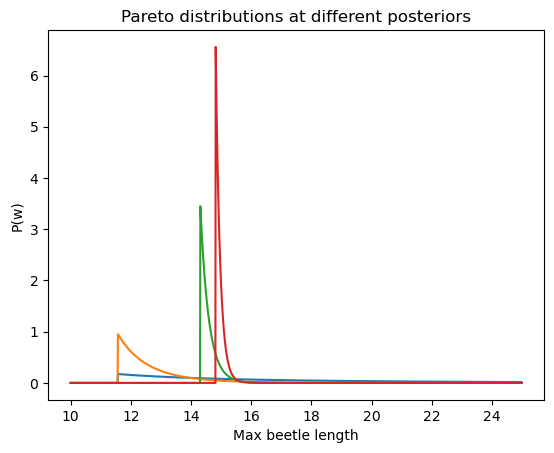

In [5]:
plt.plot(_range, posterior(d1_alpha, d1_beta, _range))
plt.plot(_range, posterior(d10_alpha, d10_beta, _range))
plt.plot(_range, posterior(d50_alpha, d50_beta, _range))
plt.plot(_range, posterior(d100_alpha, d100_beta, _range))
plt.title("Pareto distributions at different posteriors")
plt.ylabel("P(w)");
plt.xlabel("Max beetle length");

### 2C

In [6]:
np.random.seed(5)

N = 100
pi = 0.45

q0 = 0.05
q1 = 0.18

n1 = int(N * pi)
n0 = N - n1

y_obs = np.zeros(N)
y_obs[:n0] = np.random.geometric(q0, size=n0)
y_obs[n0:] = np.random.geometric(q1, size=n1)

print(y_obs)

[ 5. 40.  5. 49. 14. 19. 29. 15.  7.  5.  2. 27. 12.  4. 42.  7. 11.  7.
 20. 17. 18.  7.  7.  6.  8.  4.  4. 65. 63.  5.  1.  5. 24. 30.  1. 17.
  1. 15. 20. 83.  6. 32. 40. 50.  1. 13. 78. 10. 33. 16. 29. 13.  1.  2.
  3.  2. 17.  6.  9.  5.  6.  9. 14. 13.  9.  1.  3.  1.  4.  9.  1.  2.
  3.  2.  8.  3.  6.  4.  5. 15. 15.  1. 10.  3.  1.  3.  4. 17.  3.  1.
 10.  1.  4. 10.  4.  3.  9.  1.  5.  3.]


In [7]:
def compute_2a():

    alphas = [1, 5]
    betas = [5, 1]
    pi = 0.45

    with pm.Model() as model:
        z = pm.Bernoulli(
            "z", 
            p = pi,
            shape = 100
        )

        # Hint: you should use the shape= parameter here so that
        # q is a PyMC3 array with both q0 and q1.
        q = pm.Beta("q", alpha = alphas, beta = betas, shape = 2)

        # Hint: it may be useful to use "fancy indexing" like we did in class. 
        # See below for an example
        X = pm.Geometric(
            "X",
            p = q[z],
            observed = y_obs
        )

        trace = pm.sample(1000, chains=1, return_inferencedata=True)
        
    return (model, trace)

In [8]:
model, trace = compute_2a()

Sequential sampling (1 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [z]
>NUTS: [q]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [9]:
q_s = trace.posterior['q'].values
z_s = trace.posterior['z'].values
q_s.shape, z_s.shape

((1, 1000, 2), (1, 1000, 100))

In [10]:
q_s = q_s[0, :]
q_s

array([[0.05649993, 0.31003232],
       [0.05437224, 0.29538236],
       [0.05760329, 0.27257709],
       ...,
       [0.04926591, 0.20984997],
       [0.04726358, 0.21457923],
       [0.05405102, 0.17193756]])

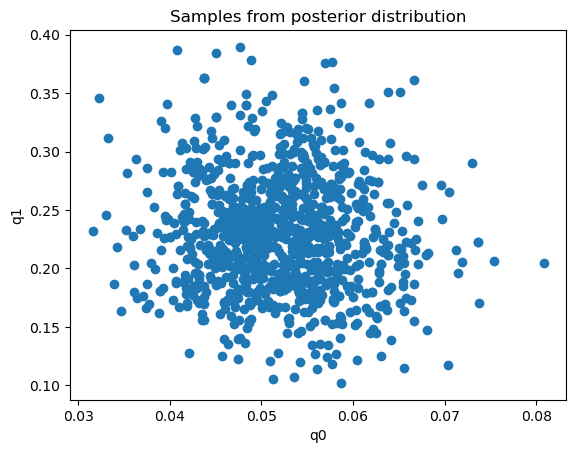

In [11]:
plt.scatter(q_s[:, 0], q_s[:, 1])
plt.title("Samples from posterior distribution")
plt.xlabel("q0")
plt.ylabel("q1");

In [12]:
q_0 = q_s[:, 0]
q_1 = q_s[:, 1]

### 2Ci

In [13]:
res = (np.count_nonzero([(100 - sum(z_s[0, i])) > sum(z_s[0, i]) for i in np.arange(1000)]) / 1000) * 100
print("Probability that factory 0 produces more boxes than factory 1 is: " + str(res), "%")

Probability that factory 0 produces more boxes than factory 1 is: 88.7 %


### 2Cii

In [14]:
print("Median estimate of factory 0's defect rate: " + str(np.median(q_0) * 100), "%")

Median estimate of factory 0's defect rate: 5.190211931483095 %


### 2D

### 3A

In [15]:
def funct(x): 
    return (np.cos(12 * x)**2) * (abs(x**3 + (6 * x) - 2)) * (((x > -1) & (x < -0.25)) or ((x > 0) & (x < 1)))

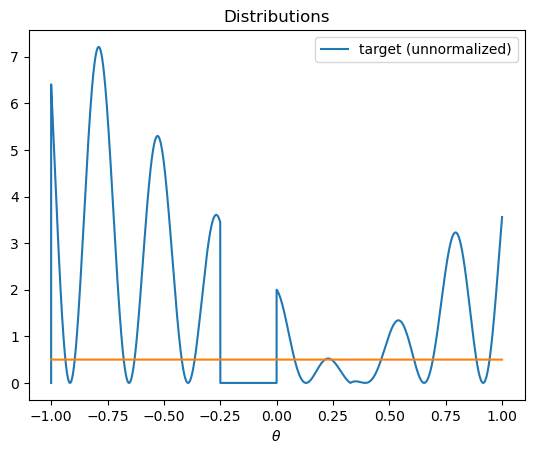

In [16]:
x = np.arange(-1, 1, 0.00001)
y = np.array([funct(i) for i in x])

uniform_y = np.array([0.5 for i in x])

plt.plot(x, y, label='target (unnormalized)')
plt.plot(x, uniform_y)
plt.legend()
plt.title('Distributions')
plt.xlabel(r'$\theta$')
plt.show()

In [17]:
M = 1
while not all(M * y <= uniform_y):
    M -= 0.00001
    if M <= -10:
        break

M

0.06933000000192206

Largest possible value of M is 0.06933.

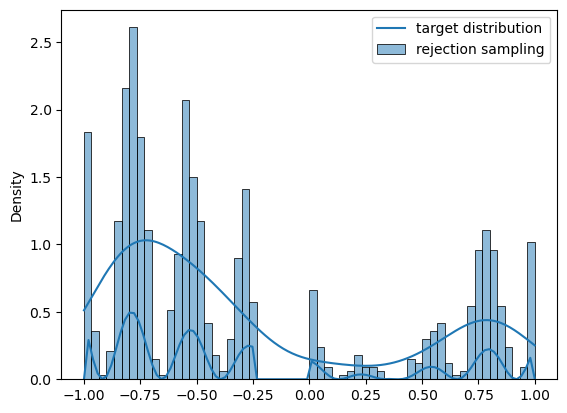

In [18]:
import numpy as np
import scipy.stats as stats

def compute_q(x):
    q_indicator = np.logical_or(
        np.logical_and(x > -1, x < -0.25),
        np.logical_and(x > 0, x < 1)
    )
    return ((np.cos(12 * x) ** 2) * np.abs((x ** 3) + (6 * x) - 2) * q_indicator) * M

def rejection_sampling(target_pdf, envelope_pdf, envelope_support, n):
    samples = np.zeros(n)
    i = 0
    while i < n:
        # generate a sample from the envelope distribution
        x = stats.uniform.rvs(loc=envelope_support[0], scale=envelope_support[1]-envelope_support[0])
        # calculate the acceptance probability
        acceptance_prob = target_pdf(x) / (envelope_pdf(x))
        # generate a uniform random variable to decide whether to accept the sample
        u = stats.uniform.rvs()
        if u < acceptance_prob:
            samples[i] = x
            i += 1
    return samples

# define the target density function
target_pdf = compute_q

# define the envelope density function (a uniform distribution in this case)
def envelope_pdf(x):
    return stats.uniform.pdf(x, loc=-1, scale=2)

# define the support of the envelope distribution
envelope_support = [-1, 1]

# generate n samples from the target distribution using rejection sampling
n = 10**3
samples = rejection_sampling(target_pdf, envelope_pdf, envelope_support, n)

# plot the histogram of the samples and compare to the target distribution
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)
plt.plot(x, target_pdf(x), label='target distribution')
sns.histplot(samples, bins=60, stat="density", kde=True, label='rejection sampling')
plt.legend()
plt.show()

In [ ]:
# generate n samples from the target distribution using rejection sampling
n = 10**6
samples = rejection_sampling(target_pdf, envelope_pdf, envelope_support, n)

# plot the histogram of the samples and compare to the target distribution
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)
plt.plot(x, target_pdf(x), label='target distribution')
sns.histplot(samples, bins=60, stat="density", kde=True, label='rejection sampling')
plt.legend()
plt.show()